In [1]:
from main import train
from joblib import Parallel, delayed
from matplotlib import pyplot as plt
from itertools import combinations, product, permutations
from tqdm.notebook import tqdm
import numpy as np
import warnings
from game_configs import *
warnings.filterwarnings("ignore")

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
base_config = {
    "device": "cuda",
    "transitions": 2_000_000,
    "hidden_size": 64,
    "buffer_size": 200_000,
    "batch_size": 2048,
    "actor_lr": 1e-2,
    "critic_lr": 1e-2,
    "gamma": 0.998,
    "tau": 0.05,
    "sigma_max": 0.1,
    "sigma_min": 0,
    "render": False,
    "seed": 42,
    "return_agents": False,
    "config": prey_freeze
}

In [3]:
dtrain = delayed(train)

In [4]:
log = train(**base_config, verbose=False)

Experiment is saved: experiments/12c8f129-67bb-4f50-ae9a-78adc1113301/
Filling up buffer...


  0%|          | 0/2000000 [00:00<?, ?it/s]

Finished. Now training...


100%|██████████| 2000000/2000000 [7:57:35<00:00, 69.80it/s]


No handles with labels found to put in legend.


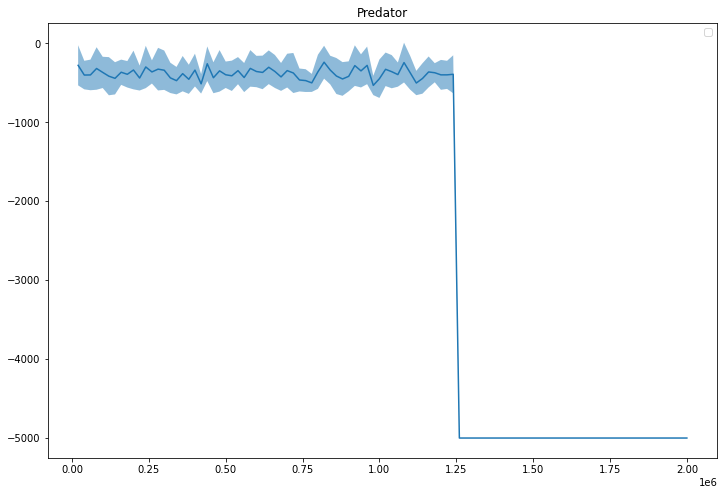

In [5]:
log.plot("step", "predator_mean", "predator_std", title="Predator")

No handles with labels found to put in legend.


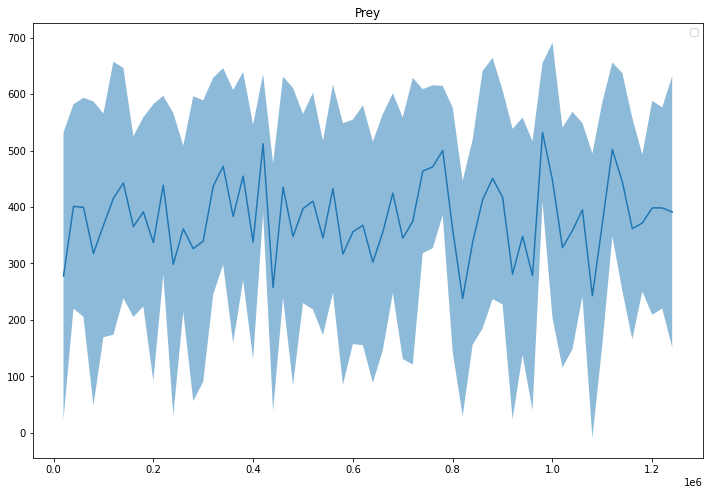

In [6]:
log.plot("step", "prey_mean", "prey_std", title="Prey")

In [7]:
# configs = []

# params = product(
#     (1_000,),                 # transitions
#     (10_000, 50_000,),  # buffer_size
#     (0.999, 0.99),              # gamma
#     (1e-3,),               # tau
#     (1e-4, 1e-3),               # actor lr
#     (2e-4, 2e-3),               # critic lr
#     (2, 1, 0.5),                # sigma
#     (256, 512, 1024),  # batch size
# )

# for transitions, buffer_size, gamma, tau, actor_lr, critic_lr, sigma_max, batch_size in params:
#     cfg = base_config.copy()
#     cfg["transitions"] = transitions
#     cfg["buffer_size"] = buffer_size
#     cfg["batch_size"] = batch_size
#     cfg["actor_lr"] = actor_lr
#     cfg["critic_lr"] = critic_lr
#     cfg["gamma"] = gamma
#     cfg["tau"] = tau
#     cfg["sigma_max"] = sigma_max
    
#     configs.append(cfg)

# print(len(configs))
# logs = Parallel(n_jobs=8)(dtrain(**cfg) for cfg in tqdm(configs))


In [8]:
# for log in logs:
#     print(log.params)
#     log.plot("step", "predator_mean", "predator_std", title="Predator")
#     log.plot("step", "prey_mean", "prey_std", title="Prey")